In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.figsize'] =  (8, 6)

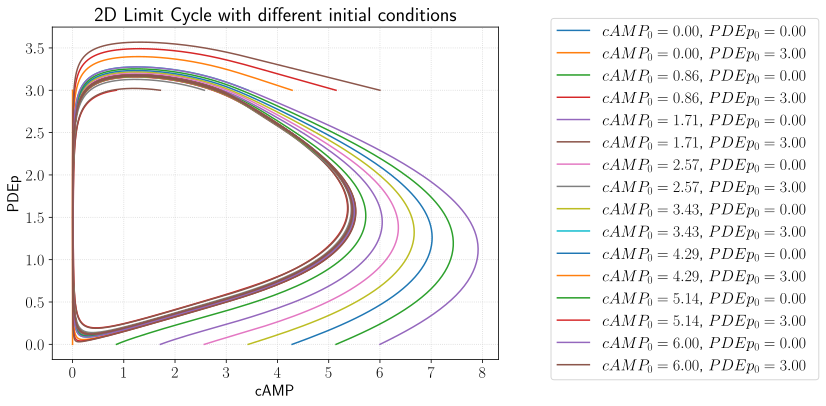

In [30]:
from scipy import linspace
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#https://www.johndcook.com/blog/2020/02/07/behold-the-brusselator/
def G(u, v, J, K): # equation (4)
    numerator = 2 * u * K # numerator of the fraction
    den_1 = v - u + v * J + u * K # first part of the denominator
    den_2 = -4 * (v - u) * u * K # second part of the denominator
    radicand = den_1**2 + den_2 # expression under the square root
    denominator = den_1 + np.sqrt(radicand) # compute the entire denominator
    return numerator / denominator # compute and return the fraction

def cAMP_PDEp_ACp(t, x):
    cAMP = x[0]
    PDEp = x[1]

    ACp = ACt*G(r1*cAMP, r2*Dt, Km1/ACt, Km2/ACt)
    dPDEp  = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dcAMP = (k1*ACp) - (k3 + k2 * PDEp) * cAMP

    return [dcAMP, dPDEp]

# oscillating parameters
k1, k3, k2 = 9.18, 0.12, 10
r1, r2, r3, r4 = 2.04, 9.34, 0.56, 1.84
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt =  1.26, 10
PDEt, Et = 9.66, 2.04

a, b = 0, 10
t = np.linspace(a, b, 5000)

cAMP_values = np.linspace(0, 6, 8)
PDEp_values = [0, 3]

# plot the limit cycle for different initial conditions
for i, cAMP_0 in enumerate(cAMP_values): # loop over initial conditions for cAMP,  enumarate gives the index
    for j, PDEp_0 in enumerate(PDEp_values): # loop over initial conditions for PDEp,  enumerate gives the index
        sol = solve_ivp(cAMP_PDEp_ACp, [a, b], [cAMP_0, PDEp_0], t_eval=t) # solve the ODE
        plt.plot(sol.y[0], sol.y[1], "-", label=rf"$cAMP_0={cAMP_0:.2f}$, $PDEp_0={PDEp_0:.2f}$")
plt.title('2D Limit Cycle with different initial conditions')
plt.xlabel('cAMP')
plt.ylabel('PDEp')
plt.grid(linestyle=':', color='lightgray')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('limit_cycle.png', dpi=300, bbox_inches='tight')
plt.show()